In [10]:
from keybert import KeyBERT
import spacy

import sqlite3
import tqdm

import numpy as np
import scipy as sp 
import pandas as pd 

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import multiprocessing as MP
import json 

kw_model = KeyBERT()

def extract_keywords(text):
    keywords = kw_model.extract_keywords(text, stop_words='english', top_n=50)
    return [kw[0] for kw in keywords]

In [2]:
%cd ../arXiv_MetadataExtraction

/Users/nakulgangolli/Desktop/arXiv_Reader/arXiv_MetadataExtraction


/opt/anaconda3/envs/BERTopic_Env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# Connect to an existing database or create a new one if it doesn't exist
con = sqlite3.connect("arxiv_astro.db")

# Create a cursor object
cur = con.cursor()
cur.execute("PRAGMA database_list;")
databases = cur.fetchall()
for db in databases:
    # The second element in the tuple is the database name (main, temp, or attached databases)
    # The third element is the path/filename
    print(db)
    print(f"Database Name: {db[1]}, Path: {db[2]}")

query = "SELECT * FROM arxiv_papers"  # Replace 'your_table_name' with the actual table name

(0, 'main', '/Users/nakulgangolli/Desktop/arXiv_Reader/arXiv_MetadataExtraction/arxiv_astro.db')
Database Name: main, Path: /Users/nakulgangolli/Desktop/arXiv_Reader/arXiv_MetadataExtraction/arxiv_astro.db


In [4]:
query = "SELECT *, STRFTIME('%Y', published) AS Year, STRFTIME('%m', published) AS Month, "+\
        "LENGTH(authors) - LENGTH(REPLACE(authors, ',', ''))+1 as NumAuthors FROM arxiv_papers"
df = pd.read_sql_query(query, con)
df.drop(columns=['published', 'updated'], inplace=True)

In [5]:
# Print out the info of the dataframe
df.info

# Count NaN values in each column
df.isnull().sum()

arXiv_ID            0
title               0
abstract            0
authors             0
categories          0
citations        5610
keywords         5610
external_json    5610
Year                0
Month               0
NumAuthors          0
dtype: int64

In [6]:
categories, category_counts = np.unique(df['categories'], return_counts=True)
SORTED = np.argsort(category_counts)[::-1]
categories, category_counts = categories[SORTED], category_counts[SORTED]

# Distribution of Categories

/var/folders/fb/68bsdqws7l1g7gz3g0rn91mh0000gn/T/ipykernel_23417/1735886382.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


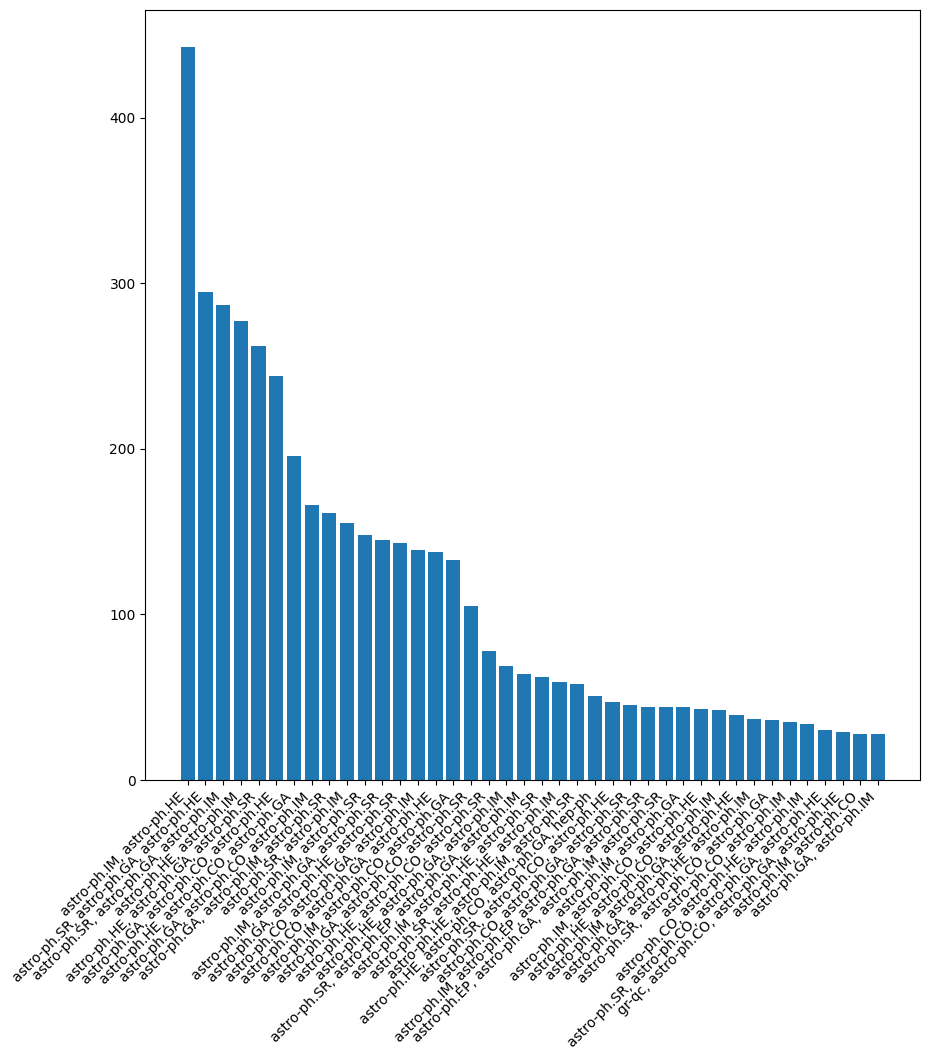

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(categories[:40], category_counts[:40],)
plt.xticks(rotation=45, ha='right') 
fig.show()

In [8]:
df_FirstTopic = pd.read_csv('abstractFirstTopics.csv')
df_FirstTopic.info

<bound method DataFrame.info of         Unnamed: 0      arXiv_ID  Month  Year  \
0                0     9501001v1      1  1995   
1                1     9501002v1      1  1995   
2                2     9501003v1      1  1995   
3                3     9501004v1      1  1995   
4                4     9501005v1      1  1995   
...            ...           ...    ...   ...   
324339      324339  2507.17660v1      7  2025   
324340      324340  2507.17825v1      7  2025   
324341      324341  2507.17833v1      7  2025   
324342      324342  2507.18188v1      7  2025   
324343      324343  2507.14343v1      7  2025   

                                                    Title  \
0                      The Origin of Galactic Cosmic Rays   
1            Turbulent Convection in Thin Accretion Disks   
2                               THE ORIGIN OF COSMIC RAYS   
3        ROSAT Observations of Compact Groups of Galaxies   
4       Gamma-Ray Transfer and Energy Deposition in Su...   
...          

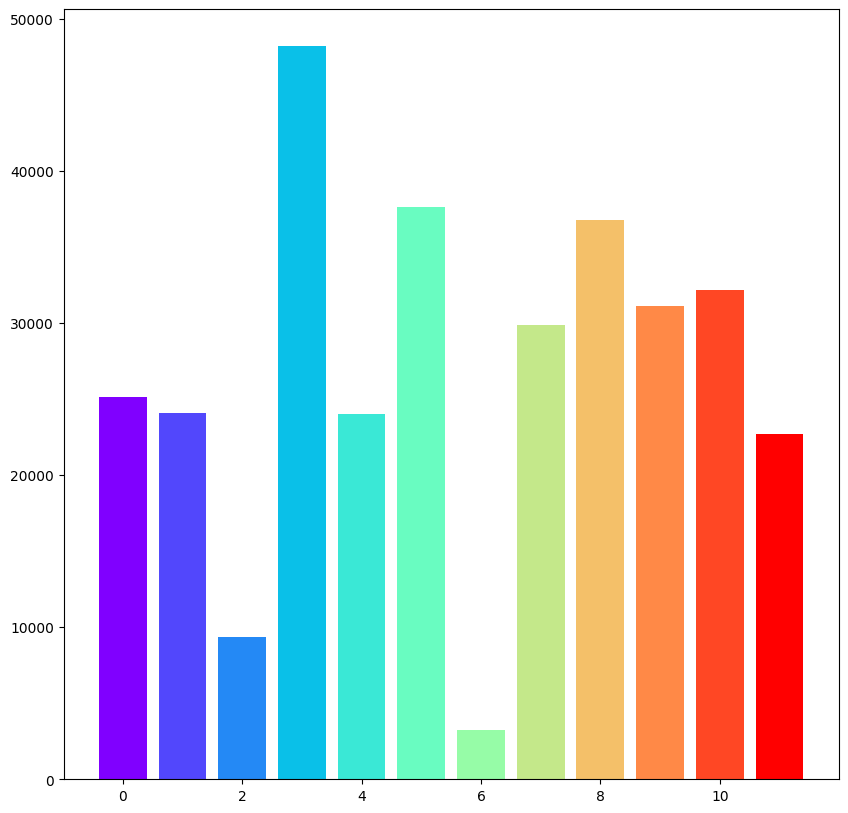

In [21]:
abstract_topics = df_FirstTopic['Topic'].values
topicID, counts = np.unique(abstract_topics, return_counts=True)

fig, ax = plt.subplots(figsize=(10,10))
colors = cm.rainbow(np.linspace(0., 1.,len(topicID)))
ax.bar(topicID, counts, color=colors[topicID])
plt.show()

12
12


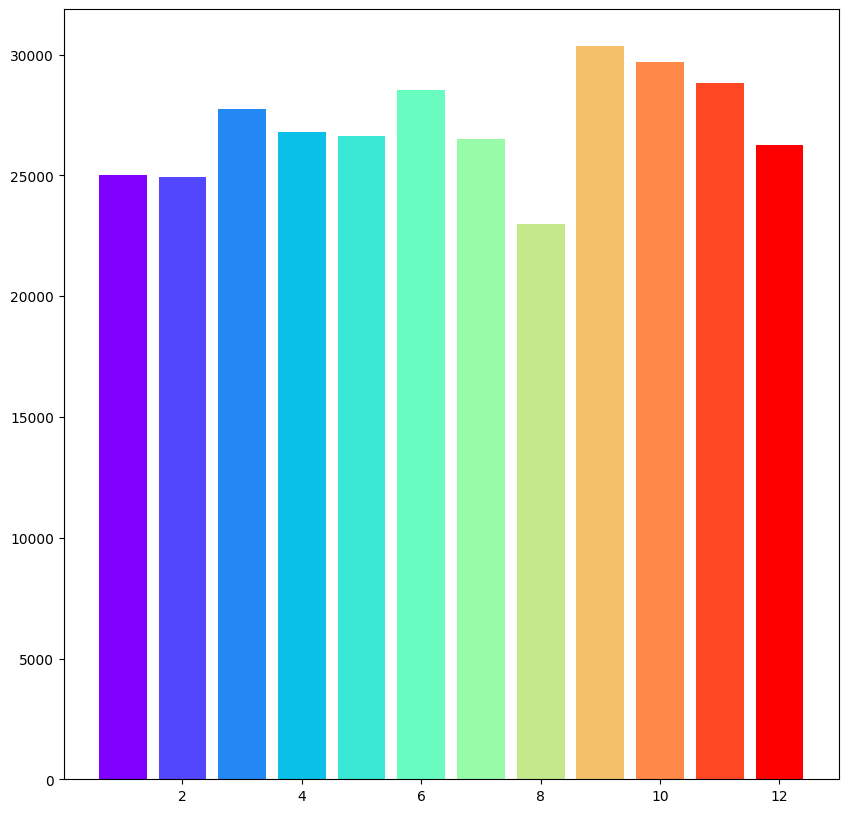

In [27]:
months = df_FirstTopic['Month'].values
months, numPerMonth = np.unique(months, return_counts=True)
print(len(months))

fig, ax = plt.subplots(figsize=(10,10))
colors = cm.rainbow(np.linspace(0., 1., len(months)))
print(len(colors))
ax.bar(months, numPerMonth, color=colors[months-1])
plt.show()

31


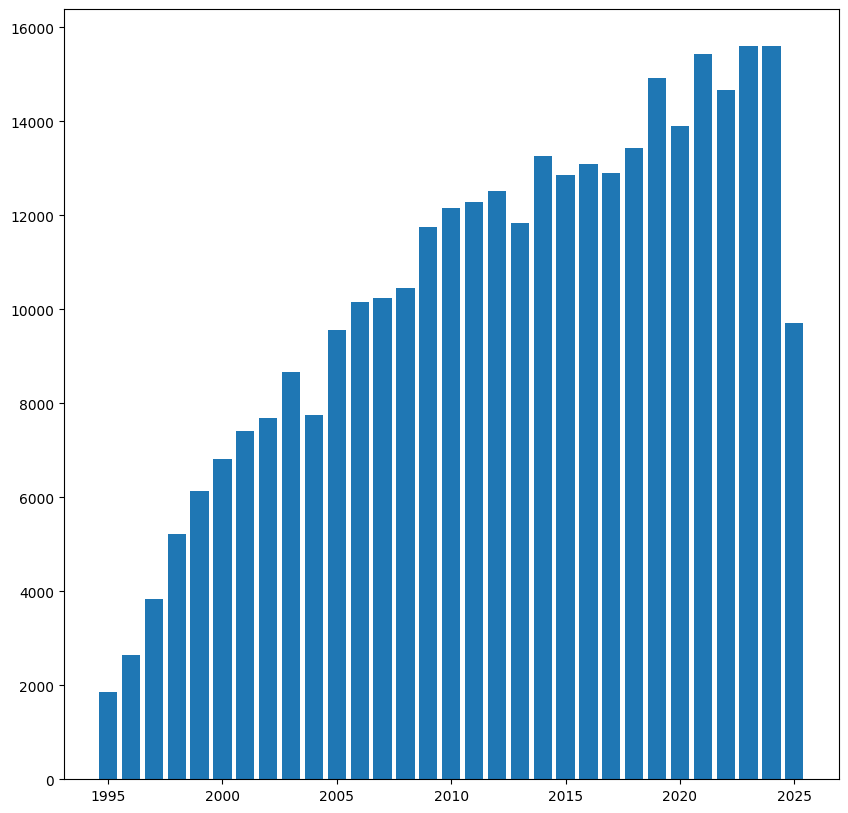

In [29]:
years = df_FirstTopic['Year'].values
years, numPerYear = np.unique(years, return_counts=True)

fig, ax = plt.subplots(figsize=(10,10))
colors = cm.rainbow(np.linspace(0., 1.,len(years)))
print(len(colors))
ax.bar(years, numPerYear,)
plt.show()